# Tópicos de Industria I
## Práctica 2 - Vuelos de Lévy

<img style="margin: 10px" src="./public/banner.png" alt="Assignment Banner" height="180" width="980" />

**E-mail:** roberto.carrillo7958@alumnos.udg.mx
**Ciclo:** 2023-A

## Vuelos de Lévy

Como parte de 

## MODULES

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from plotly.subplots import make_subplots
import plotly.graph_objects as go

from scipy.stats import levy_stable

## CLASSES

In [4]:
################# http://www.pygame.org/wiki/2DVectorClass ##################
class Vec2d(object):
    """2d vector class, supports vector and scalar operators,
    and also provides a bunch of high level functions
    """
    __slots__ = ['x', 'y']

    def __init__(self, x_or_pair, y = None):
        if y == None:            
            self.x = x_or_pair[0]
            self.y = x_or_pair[1]
        else:
            self.x = x_or_pair
            self.y = y
            
    # Addition
    def __add__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x + other.x, self.y + other.y)
        elif hasattr(other, "__getitem__"):
            return Vec2d(self.x + other[0], self.y + other[1])
        else:
            return Vec2d(self.x + other, self.y + other)

    # Subtraction
    def __sub__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x - other.x, self.y - other.y)
        elif (hasattr(other, "__getitem__")):
            return Vec2d(self.x - other[0], self.y - other[1])
        else:
            return Vec2d(self.x - other, self.y - other)
    
    # Vector length
    def get_length(self):
        return math.sqrt(self.x**2 + self.y**2)
    
    # rotate vector
    def rotated(self, angle):        
        cos = math.cos(angle)
        sin = math.sin(angle)
        x = self.x*cos - self.y*sin
        y = self.x*sin + self.y*cos
        return Vec2d(x, y)

## Actividad 1: Lévy distribution - N Curves (3 pts)

* Generar al menos las 4 curvas de distribución timpo Lévy stable que se observan en la imagen
* Visualizar con **plotly**

* Parametros m = 3.0, Levy_exponent = x, beta = 0

<!-- ![levy.png](attachment:levy.png) -->

In [28]:
# Parámetros Iniciales

# Resolución o n_steps
resolution = 500
# Beta
beta = 0
# Definiendo vector auxiliar
aux_domain = np.linspace(-np.pi, np.pi, resolution)
# Definiendo un conjunto de exponentes para generar diferentes distribuciones
Levy_Exps = [0.3, 0.4, 0.6, 0.9]
# CRW Figure
fig_levy_stable_pdf = go.Figure()
# Create aux plot
aux_plot = np.linspace(-np.pi,np.pi, resolution)

# Definiendo función para generar función de densidad de probabilidad de Levy
def levy_stable_pdf_exp(Levy_exp):
  return np.array([levy_stable.pdf(i, Levy_exp, beta) for i in aux_domain])

def plot_levy_stable_pdf(levy_stable_pdf, plotname):
  # Agregamos el trazo de la función al gráfico
  fig_levy_stable_pdf.add_trace(go.Scatter( 
    x = aux_plot,
    y = levy_stable_pdf,
    marker = dict(size=2),
    line = dict(width=2),
    mode = 'lines',
    name = plotname,
  ))

In [29]:
for exp in Levy_Exps:
  levy_stable_pdf = levy_stable_pdf_exp(exp)
  plot_levy_stable_pdf(levy_stable_pdf, f'levy_{exp}')

fig_levy_stable_pdf.update_layout(title_text='Levy_Stable Density Functions at different exponents')
fig_levy_stable_pdf.show()

## Actividad 2: Lévy distribution - Histogram + Curve (4 pts)

* A partir de un conjunto de valores aleatorios extraidos de una distribución tipo Lévy stable, obtener su histograma y comparar con la curva correspondiente PDF
* Visualizar con **matplotlib**

(array([0.00419624, 0.        , 0.        , ..., 0.        , 0.        ,
        0.00419624]),
 array([-138518.88029576, -138518.28452469, -138517.68875362, ...,
          18687.23216459,   18687.82793566,   18688.42370673]),
 [<matplotlib.patches.Polygon at 0x17b3e9d2760>])

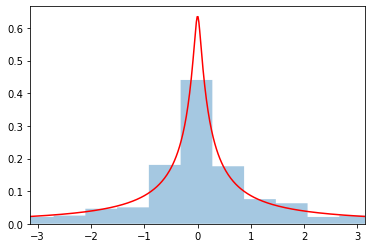

In [41]:
# Parámetros Iniciales

# Resolución o n_steps
resolution = 400
# Exponente de levy
Levy_exp = 0.5
# Beta
beta = 0
# Definiendo vectores auxiliar
aux_plot = np.linspace(-np.pi, np.pi, resolution)

# CRW Figure
fig_Levy_pdf_histogram, ax = plt.subplots(1,1)

# Definiendo función para generar wrapcauchy
def levy_stable_pdf_exp(Levy_exp):
  return np.array([levy_stable.pdf(i, Levy_exp, beta) for i in aux_plot])


levy_stable_data = levy_stable.rvs(Levy_exp, beta, size=resolution)
ax.set_xlim([-np.pi, np.pi])
ax.plot(aux_plot, levy_stable_pdf_exp(Levy_exp), 'r-', label="Levy stable pdf")
ax.hist(levy_stable_data, density=True, bins='auto', histtype='stepfilled', alpha=0.4)



## Actividad 3: Lévy ﬂight - Vec2d - 1 Trajectory (6 pts)

* Utilizar **Vec2d**
* Guardar trayectorias en **Pandas** Data Frame
* Visualizar proyección en 3d con **plotly**

## Actividad 4: Correlated Random Walk - Vec2d - N Trajectories (7 pts)

* Generar tantas trayectorias tipo CRW como se especifique en una variable n_traj
* Cada una de las debe tener un coeficiente de Cauchy diferente
* Utilizar **Vec2d**
* Guardar trayectorias en **Pandas** Data Frame
* Visualizar proyección en 3d con **plotly**
* Exportar trayectorias como *pkl*